In [1]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
import pandas as pd
import numpy as np

In [3]:
araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed'
araport11_isoform = pd.read_csv(araport11_isoform_path, sep='\t', 
                                names=['chrom', 'chromStart', 'chromEnd', 'name', 
                                       'score', 'strand', 'thickStart', 'thickEnd', 
                                       'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
                               )
araport11_isoform['gene_id'] = araport11_isoform['name'].map(lambda x: x.split('.')[0])
araport11_isoform.set_index('gene_id', inplace=True)

In [4]:
import sys
sys.path.append('/public/home/mowp/workspace/termination/cbRNA_pool/script/')

In [5]:
%load_ext autoreload
%autoreload 1
%aimport igv

In [6]:
%store -r output_res

# long and short termination window example

## long

n = 158


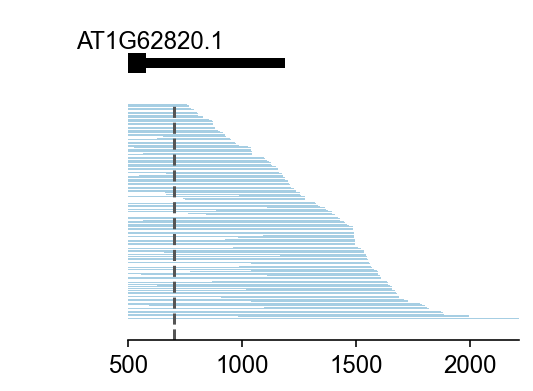

In [225]:
# get gene info
gene_id = 'AT1G62820'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query('gene_id == @gene_id').values[0]
if strand == '+':
    end = pas+500
else:
    start = pas-500

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        start_before=pas-50,
    )

else:
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        end_after = pas+50
    )

ax = igv_plot.plot(
    height=3, width=3.5,
    # polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1
)
ax[1].axvline(pas, ls="--", color="#555555")

if strand == '-':
    plt.xlim(pas+200)
else:
    plt.xlim(pas-200)
    
xlim = plt.xlim()
# plt.tight_layout()
plt.savefig(f'{gene_id}.partial.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

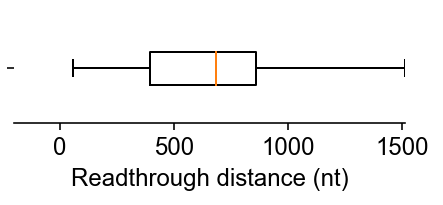

In [226]:
if strand == '-':
    readthrough_len = pas - igv_plot.bam_list[0]['start']
else:
    readthrough_len = igv_plot.bam_list[0]['end'] - pas

plt.figure(figsize=(3.5, 1))
plt.boxplot(readthrough_len, widths=.3, showfliers = False, labels=[''], vert=False)
plt.xlabel('Readthrough distance (nt)')
plt.xlim(-200, pas-xlim[1])
sns.despine(top=True, right=True, left=True)
plt.savefig(f'{gene_id}.boxplot.svg')

## short

n = 113


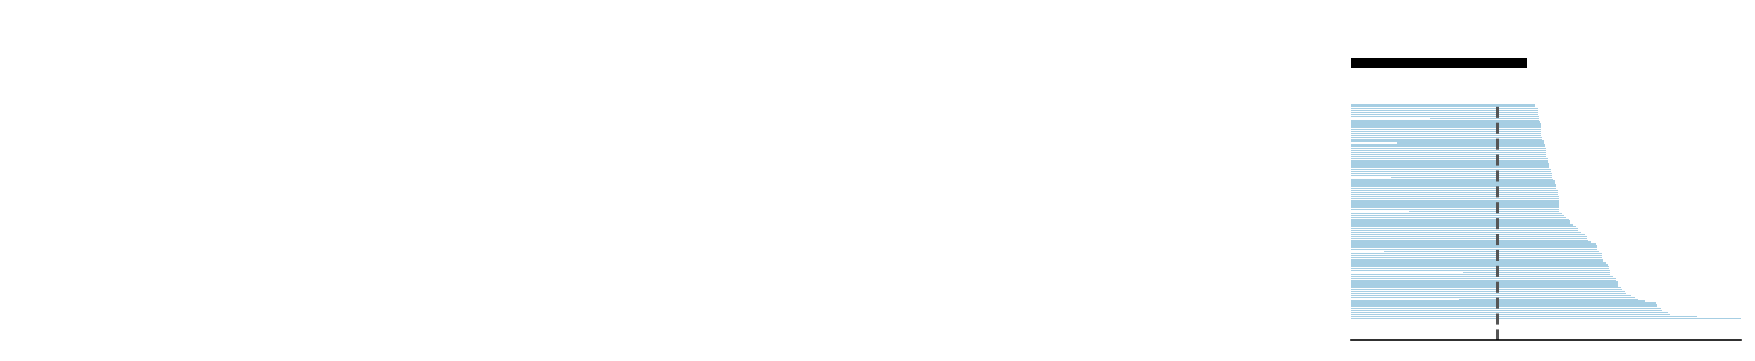

In [242]:
# get gene info
gene_id = 'AT3G51730'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query('gene_id == @gene_id').values[0]
if strand == '+':
    end = pas+500
else:
    start = pas-500

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        start_before=pas-50,
    )

else:
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        end_after = pas+50
    )

ax = igv_plot.plot(
    height=3, width=3.5,
    # polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1
)
ax[1].axvline(pas, ls="--", color="#555555")

if strand == '-':
    plt.xlim(pas+200)
else:
    plt.xlim(pas-200)
    
xlim = plt.xlim()
xlim = plt.xlim(xlim[0], max(igv_plot.bam_list[0]['end']))
# plt.tight_layout()
plt.savefig(f'{gene_id}.partial.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

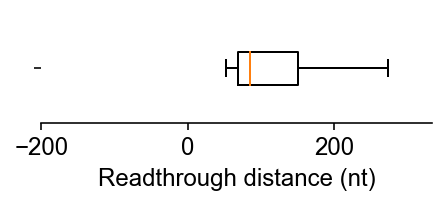

In [243]:
if strand == '-':
    readthrough_len = pas - igv_plot.bam_list[0]['start']
else:
    readthrough_len = igv_plot.bam_list[0]['end'] - pas

plt.figure(figsize=(3.5, 1))
plt.boxplot(readthrough_len, widths=.3, showfliers = False, labels=[''], vert=False)
plt.xlabel('Readthrough distance (nt)')
plt.xlim(-200, xlim[1]-pas)
sns.despine(top=True, right=True, left=True)
plt.savefig(f'{gene_id}.boxplot.svg')

# median vs longest example

n = 373
n = 160


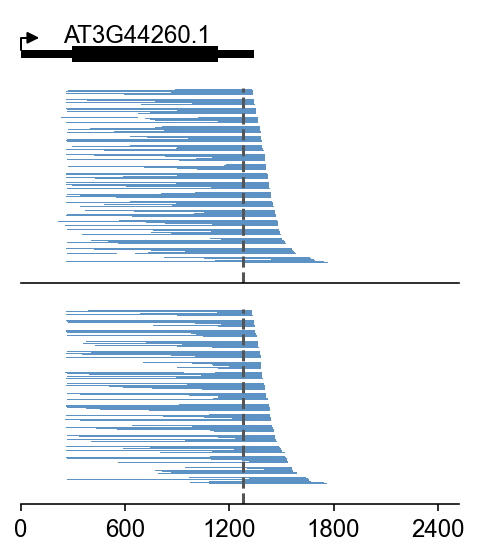

In [113]:
# get gene info
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc['AT3G44260']
gene_id = mRNA_id.split('.')[0]
start = 15951220
pas = 15952069

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id},
)

infile = '/public/home/mowp/test/nanopore_test/cbRNA_3/elongating_data/cbRNA_3.elongating.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    filter_strand = strand,
    #end_after = pas+50
    start_before=pas-50,
)

infile = '/public/home/mowp/test/nanopore_test/cbRNA_2/elongating_data/cbRNA_2.elongating.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    filter_strand = strand,
    #end_after = pas+50
    start_before=pas-50,
)

igv_plot.plot(
    height=4, width=3.5,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1
)
plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

n = 373
n = 160


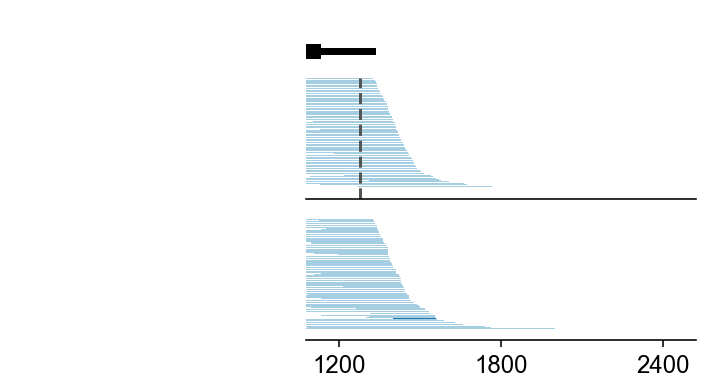

In [30]:
# get gene info
gene_id = 'AT3G44260'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query('gene_id == @gene_id').values[0]
if strand == '+':
    end = pas+500
else:
    start = pas-500

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id, 'AT5G11325.1'},
)

infile = '/public/home/mowp/test/nanopore_test/cbRNA_3/elongating_data/cbRNA_3.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        start_before=pas-50,
    )

else:
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        end_after = pas+50
    )

infile = '/public/home/mowp/test/nanopore_test/cbRNA_2/elongating_data/cbRNA_2.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        start_before=pas-50,
    )

else:
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        end_after = pas+50
    )

ax = igv_plot.plot(
    height=3, width=3.5,
    # polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1.5
)
ax[1].axvline(pas, ls="--", color="#555555")

if strand == '-':
    xlim = plt.xlim(pas+200, min(igv_plot.bam_list[0]['start']))
else:
    xlim = plt.xlim(pas-200, max(igv_plot.bam_list[0]['end']))

# plt.tight_layout()
plt.savefig(f'{gene_id}.partial.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

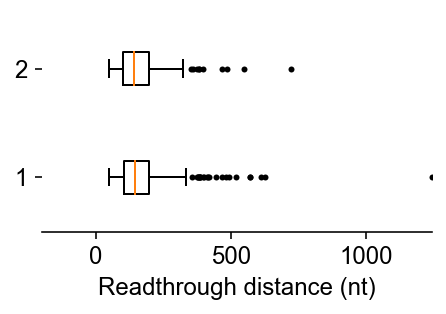

In [31]:
readthrough_len = []
if strand == '-':
    readthrough_len_ = pas - igv_plot.bam_list[0]['start']
else:
    readthrough_len_ = igv_plot.bam_list[0]['end'] - pas
readthrough_len.append(readthrough_len_)

if strand == '-':
    readthrough_len_ = pas - igv_plot.bam_list[1]['start']
else:
    readthrough_len_ = igv_plot.bam_list[1]['end'] - pas
readthrough_len.append(readthrough_len_)

plt.figure(figsize=(3.5, 2))

flierprops = dict(marker='o', markersize=3, markerfacecolor='k', markeredgecolor='none')

plt.boxplot(readthrough_len, widths=.3, showfliers = True, flierprops=flierprops, vert=False)
plt.xlabel('Readthrough distance (nt)')
if strand == '-':
    plt.xlim(-200, pas-xlim[1])
else:
    plt.xlim(-200, xlim[1]-pas)

# if strand == '-':
#     plt.xlim(-200)
# else:
#     plt.xlim(-200)

sns.despine(top=True, right=True, left=True)
plt.savefig(f'{gene_id}.boxplot.svg')

# neighboring genes example

## Nanopore data (FLEP-seq)

n = 205
n = 164


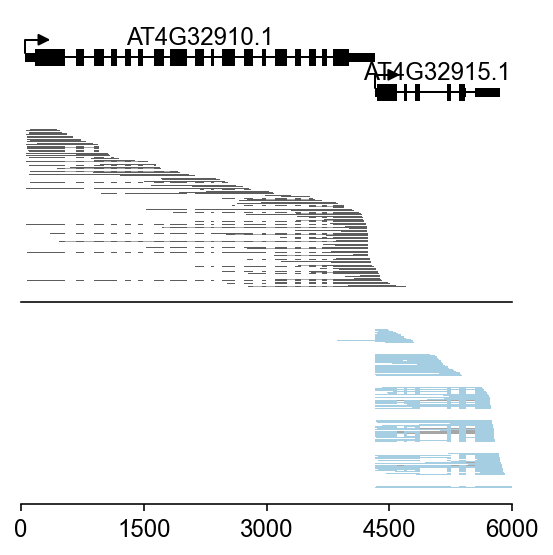

In [167]:
chrom, start, end, strand = '4', 15881198, 15887199, '+'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT4G32910'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT4G32915'},
)

igv_plot.plot(
    height=4, width=4, 
    gene_track_height=1,
    #polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz'
)
plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

## Illumina data (GRO-seq)

n = 903


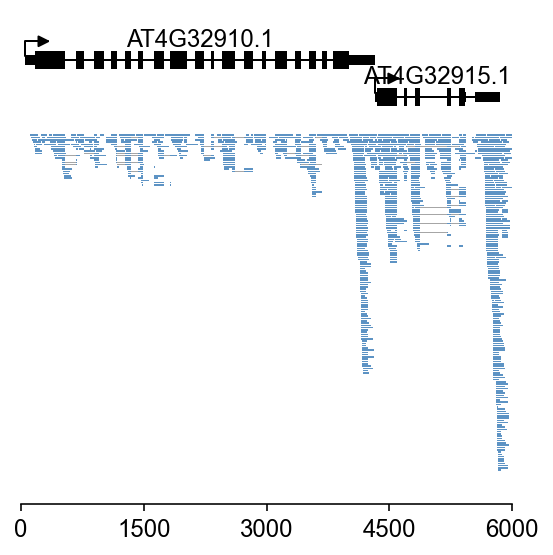

In [170]:
chrom, start, end, strand = '4', 15881198, 15887199, '+'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
)

infile = '/public/home/lab-zhai/edit_share/jbrowse/tair10/Kindgren_2019_GSE131733/s01_WT_RT_rep1/aligned_data/s01_WT_RT_rep1.bam'
igv_plot.add_bam(
    infile,
)

igv_plot.plot(
    height=4, width=4, 
    gene_track_height=.5,
    #polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz'
)
plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

## Comparation 

n = 205
n = 164
n = 903


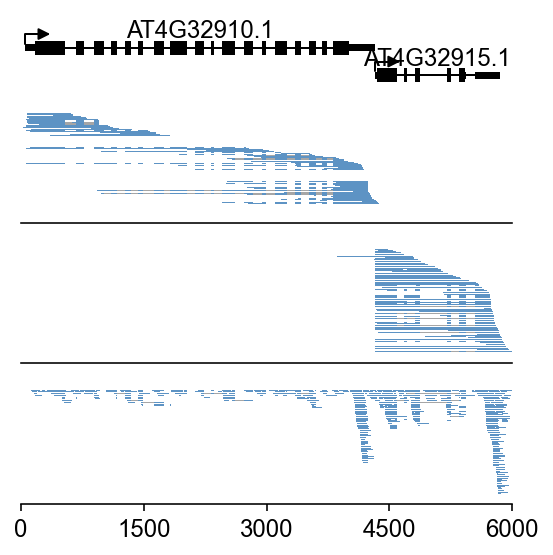

In [10]:
chrom, start, end, strand = '4', 15881198, 15887199, '+'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT4G32910'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT4G32915'},
)


infile = '/public/home/lab-zhai/edit_share/jbrowse/tair10/Kindgren_2019_GSE131733/s01_WT_RT_rep1/aligned_data/s01_WT_RT_rep1.bam'
igv_plot.add_bam(
    infile,
)

igv_plot.plot(
    height=4, width=4, 
    gene_track_height=1.2,
    #polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz'
)

plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

# tRNA gene downstream examples

## AT4G36195

n = 100


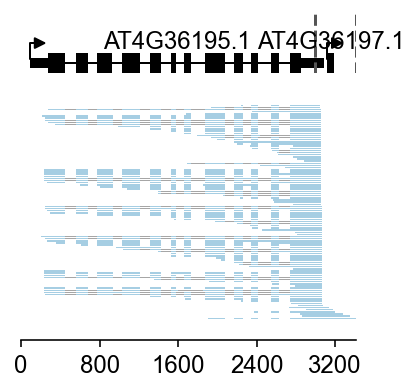

In [307]:
# get gene info
gene_id = 'AT4G36195'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query('gene_id == @gene_id').values[0]
if strand == '+':
    end = pas+500
else:
    start = pas-500

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id, 'AT4G36197.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        start_before=pas-50,
    )

else:
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        end_after = pas+50
    )

ax = igv_plot.plot(
    height=3, width=3,
    # polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1
)
xlim = plt.xlim()
if strand == '-':
    xlim = plt.xlim(xlim[0], min(igv_plot.bam_list[0]['start']))
else:
    xlim = plt.xlim(xlim[0], max(igv_plot.bam_list[0]['end']))
    
ax[0].axvline(pas, ls="--", color="#555555")
ax[0].axvline(xlim[1], ls="--", color="#555555")
plt.savefig(f'{gene_id}.all.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

n = 100
n = 100


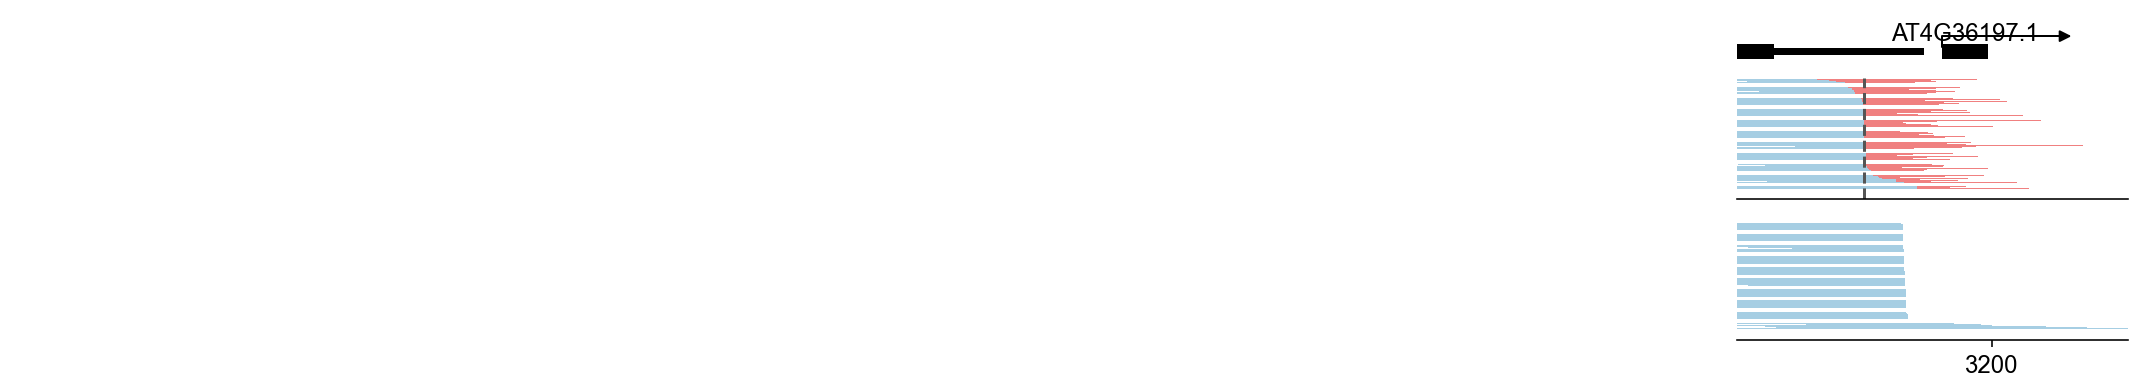

In [308]:
# get gene info
gene_id = 'AT4G36195'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query('gene_id == @gene_id').values[0]
if strand == '+':
    end = pas+500
else:
    start = pas-500

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id, 'AT4G36197.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/cbRNA.polyadenylated.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id},
        method='3_end',
        filter_strand = strand,
        start_before=pas-50,
    )

else:
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        end_after = pas+50
    )

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        start_before=pas-50,
    )

else:
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        end_after = pas+50
    )

ax = igv_plot.plot(
    height=3, width=3.5,
    # polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1.5
)
ax[1].axvline(pas, ls="--", color="#555555")

if strand == '-':
    xlim = plt.xlim(pas+200, min(igv_plot.bam_list[1]['start']))
else:
    xlim = plt.xlim(pas-200, max(igv_plot.bam_list[1]['end']))

# plt.tight_layout()
plt.savefig(f'{gene_id}.partial.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

## AT1G09130

n = 54


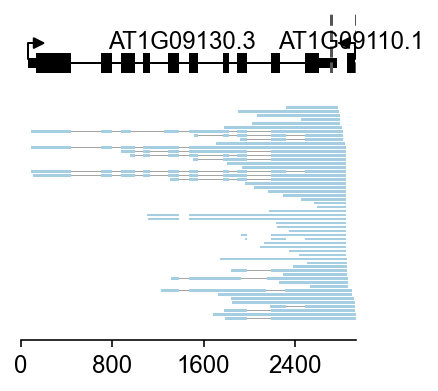

In [372]:
# get gene info
gene_id = 'AT1G09130'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query('gene_id == @gene_id').values[0]
if strand == '+':
    end = pas+500
else:
    start = pas-500

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id, 'AT1G09110.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        start_before=pas-50,
    )

else:
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        end_after = pas+50
    )

ax = igv_plot.plot(
    height=3, width=3,
    # polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1
)
xlim = plt.xlim()
if strand == '-':
    xlim = plt.xlim(xlim[0], min(igv_plot.bam_list[0]['start']))
else:
    xlim = plt.xlim(xlim[0], max(igv_plot.bam_list[0]['end']))
    
ax[0].axvline(pas, ls="--", color="#555555")
ax[0].axvline(xlim[1], ls="--", color="#555555")
plt.savefig(f'{gene_id}.all.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

n = 71
n = 54


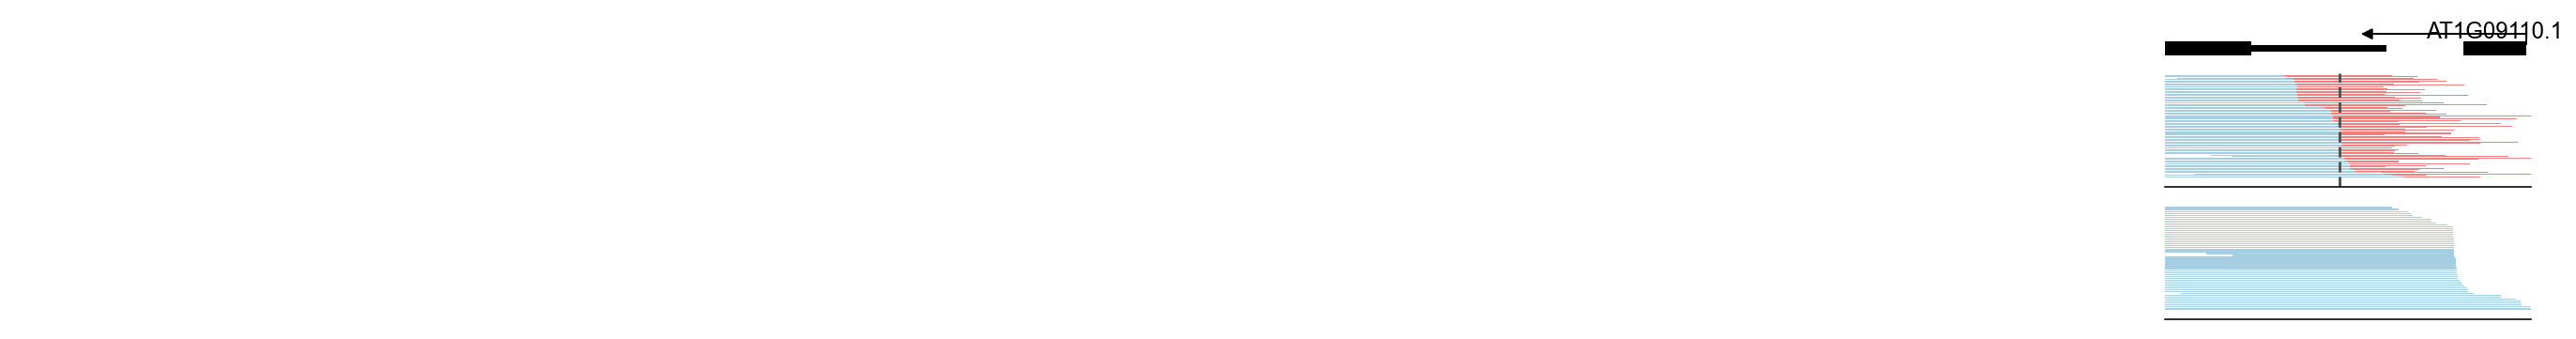

In [370]:
# get gene info
gene_id = 'AT1G09130'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query('gene_id == @gene_id').values[0]
if strand == '+':
    end = pas+500
else:
    start = pas-500

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id, 'AT1G09110.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/cbRNA.polyadenylated.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id},
        method='3_end',
        filter_strand = strand,
        start_before=pas-50,
    )

else:
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        end_after = pas+50
    )

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        start_before=pas-50,
    )

else:
    igv_plot.add_bam(
        infile,
        gene_list = {gene_id, 'None'},
        method='3_end',
        filter_strand = strand,
        end_after = pas+50
    )

ax = igv_plot.plot(
    height=3, width=3.5,
    # polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1.5
)
ax[1].axvline(pas, ls="--", color="#555555")

if strand == '-':
    xlim = plt.xlim(pas+200, min(igv_plot.bam_list[1]['start']))
else:
    xlim = plt.xlim(pas-200, max(igv_plot.bam_list[1]['end']))

# plt.tight_layout()
plt.savefig(f'{gene_id}.partial.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

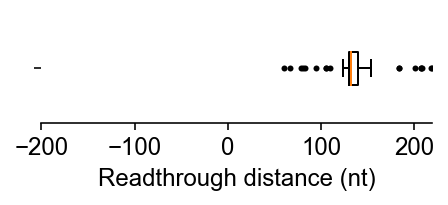

In [371]:
if strand == '-':
    readthrough_len = pas - igv_plot.bam_list[1]['start']
else:
    readthrough_len = igv_plot.bam_list[1]['end'] - pas

plt.figure(figsize=(3.5, 1))

flierprops = dict(marker='o', markersize=3, markerfacecolor='k', markeredgecolor='none')

plt.boxplot(readthrough_len, widths=.3, showfliers = True, flierprops=flierprops, labels=[''], vert=False)
plt.xlabel('Readthrough distance (nt)')
if strand == '-':
    plt.xlim(-200, pas-xlim[1])
else:
    plt.xlim(-200, xlim[1]-pas)
    
sns.despine(top=True, right=True, left=True)
plt.savefig(f'{gene_id}.boxplot.svg')

# cleaved and readthrough transcripts

## AT2G41430

### xrn3 AT2G41430

n = 166
n = 228
n = 69
n = 655


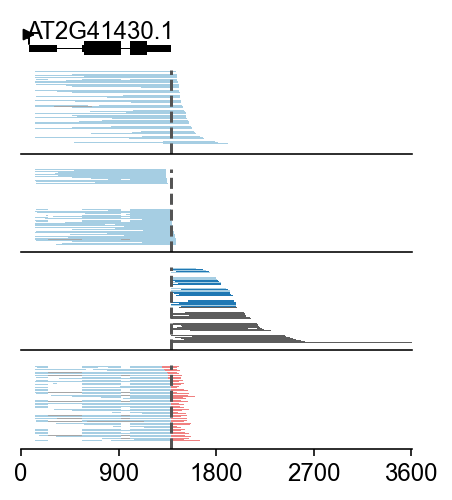

In [47]:
##### get gene info
gene_id = 'AT2G41430'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query(
    'gene_id == @gene_id').values[0]
if strand == '+':
    end = pas + 200
else:
    start = pas - 200

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list={mRNA_id, 'AT2G41430.1'},
)

# 1
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        start_before=pas - 50,
        end_after=pas + 50
    )

else:
    igv_plot.add_bam(infile,
                     gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     start_before=pas - 50,
                     end_after=pas + 50)
    
# 2
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        # gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        start_before=pas+50,
        start_after=pas-50,
    )

else:
    igv_plot.add_bam(infile,
                     # gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     end_after=pas-50,
                     end_before=pas+50,
                    )
    
# 3
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        # gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        end_before=pas,
    )

else:
    igv_plot.add_bam(infile,
                     # gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     start_after=pas)

# 4
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/polyadenylated_data/20210301_xrn3.polyadenylated.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list={gene_id},
        method='3_end',
        filter_strand=strand,
        start_before=pas - 50,
    )

else:
    igv_plot.add_bam(infile,
                     gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     end_after=pas + 50)

ax = igv_plot.plot(
    height=4,
    width=3.5,
    # polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=2)

ax[1].axvline(pas, ls="--", color="#555555")
ax[2].axvline(pas, ls="--", color="#555555")
ax[3].axvline(pas, ls="--", color="#555555")
ax[4].axvline(pas, ls="--", color="#555555")
xlim = plt.xlim()

# if strand == '-':
#     xlim = plt.xlim(pas + 200, min(igv_plot.bam_list[1]['start']))
# else:
#     xlim = plt.xlim(pas - 200, max(igv_plot.bam_list[1]['end']))

# ax[0].axvline(pas, ls="--", color="#555555")
# ax[0].axvline(xlim[1], ls="--", color="#555555")

# plt.tight_layout()
plt.savefig(f'{gene_id}.all.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

In [48]:
xlim

(17269157.0, 17272759.0)

### WT AT2G41430

n = 505
n = 935
n = 3
n = 2659


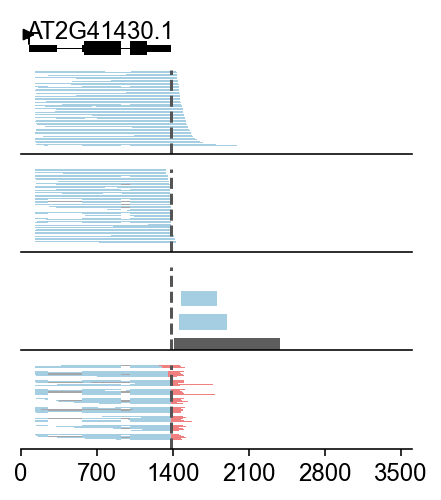

In [51]:
# get gene info
gene_id = 'AT2G41430'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query(
    'gene_id == @gene_id').values[0]
if strand == '+':
    end = pas + 200
else:
    start = pas - 200

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list={mRNA_id, 'AT2G41430.1'},
)

# 1
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/elongating_data/20210324_col_nuclear.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        start_before=pas - 50,
        end_after=pas + 50
    )

else:
    igv_plot.add_bam(infile,
                     gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     start_before=pas - 50,
                     end_after=pas + 50)
    
    
# 2
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/elongating_data/20210324_col_nuclear.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        # gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        start_before=pas+50,
        start_after=pas-50,
    )

else:
    igv_plot.add_bam(infile,
                     # gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     end_after=pas-50,
                     end_before=pas+50,
                    )

# 3
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/elongating_data/20210324_col_nuclear.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        # gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        end_before=pas,
    )

else:
    igv_plot.add_bam(infile,
                     # gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     start_after=pas)

# 4
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/polyadenylated_data/20210324_col_nuclear.polyadenylated.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list={gene_id},
        method='3_end',
        filter_strand=strand,
        start_before=pas - 50,
    )

else:
    igv_plot.add_bam(infile,
                     gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     end_after=pas + 50)

ax = igv_plot.plot(
    height=4,
    width=3.5,
    # polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=2)

# if strand == '-':
#     xlim = plt.xlim(pas + 200, min(igv_plot.bam_list[1]['start']))
# else:
#     xlim = plt.xlim(pas - 200, max(igv_plot.bam_list[1]['end']))

ax[1].axvline(pas, ls="--", color="#555555")
ax[2].axvline(pas, ls="--", color="#555555")
ax[3].axvline(pas, ls="--", color="#555555")
ax[4].axvline(pas, ls="--", color="#555555")
plt.xlim(xlim)

# plt.tight_layout()
plt.savefig(f'{gene_id}.all.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

## AT5G06320

### xrn3 AT5G06320

n = 91
n = 103
n = 56
n = 202


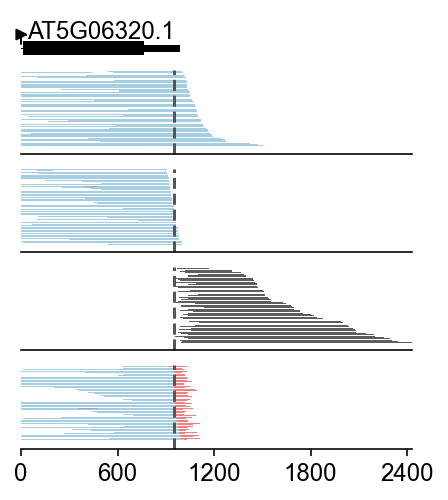

In [54]:
##### get gene info
gene_id = 'AT5G06320'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query(
    'gene_id == @gene_id').values[0]
if strand == '+':
    end = pas + 200
else:
    start = pas - 200

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list={mRNA_id, 'AT5G06320.1'},
)

# 1
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        start_before=pas - 50,
        end_after=pas + 50
    )

else:
    igv_plot.add_bam(infile,
                     gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     start_before=pas - 50,
                     end_after=pas + 50)
    
# 2
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        # gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        start_before=pas+50,
        start_after=pas-50,
    )

else:
    igv_plot.add_bam(infile,
                     # gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     end_after=pas-50,
                     end_before=pas+50,
                    )
    
# 3
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        # gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        end_before=pas,
    )

else:
    igv_plot.add_bam(infile,
                     # gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     start_after=pas)

# 4
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/polyadenylated_data/20210301_xrn3.polyadenylated.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list={gene_id},
        method='3_end',
        filter_strand=strand,
        start_before=pas - 50,
    )

else:
    igv_plot.add_bam(infile,
                     gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     end_after=pas + 50)

ax = igv_plot.plot(
    height=4,
    width=3.5,
    # polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=2)

ax[1].axvline(pas, ls="--", color="#555555")
ax[2].axvline(pas, ls="--", color="#555555")
ax[3].axvline(pas, ls="--", color="#555555")
ax[4].axvline(pas, ls="--", color="#555555")
xlim = plt.xlim()

# if strand == '-':
#     xlim = plt.xlim(pas + 200, min(igv_plot.bam_list[1]['start']))
# else:
#     xlim = plt.xlim(pas - 200, max(igv_plot.bam_list[1]['end']))

# ax[0].axvline(pas, ls="--", color="#555555")
# ax[0].axvline(xlim[1], ls="--", color="#555555")

# plt.tight_layout()
plt.savefig(f'{gene_id}.all.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

In [47]:
xlim

(1931029.0, 1929353.0)

### WT AT5G06320

n = 254
n = 244
n = 2
n = 425


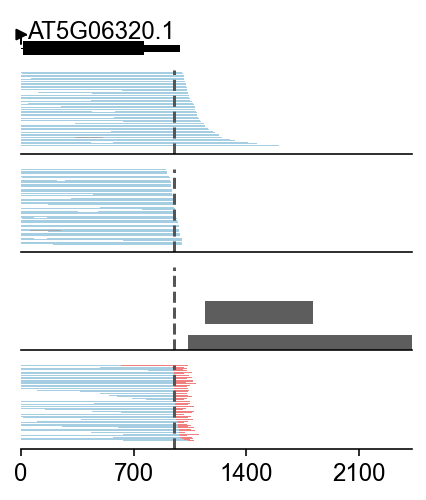

In [55]:
##### get gene info
gene_id = 'AT5G06320'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query(
    'gene_id == @gene_id').values[0]
if strand == '+':
    end = pas + 200
else:
    start = pas - 200

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list={mRNA_id, 'AT2G41430.1'},
)

# 1
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/elongating_data/20210324_col_nuclear.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        start_before=pas - 50,
        end_after=pas + 50
    )

else:
    igv_plot.add_bam(infile,
                     gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     start_before=pas - 50,
                     end_after=pas + 50)
    
    
# 2
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/elongating_data/20210324_col_nuclear.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        # gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        start_before=pas+50,
        start_after=pas-50,
    )

else:
    igv_plot.add_bam(infile,
                     # gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     end_after=pas-50,
                     end_before=pas+50,
                    )

# 3
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/elongating_data/20210324_col_nuclear.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        # gene_list={gene_id, 'None'},
        method='3_end',
        filter_strand=strand,
        end_before=pas,
    )

else:
    igv_plot.add_bam(infile,
                     # gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     start_after=pas)

# 4
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/polyadenylated_data/20210324_col_nuclear.polyadenylated.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        gene_list={gene_id},
        method='3_end',
        filter_strand=strand,
        start_before=pas - 50,
    )

else:
    igv_plot.add_bam(infile,
                     gene_list={gene_id, 'None'},
                     method='3_end',
                     filter_strand=strand,
                     end_after=pas + 50)

ax = igv_plot.plot(
    height=4,
    width=3.5,
    # polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=2)

# if strand == '-':
#     xlim = plt.xlim(pas + 200, min(igv_plot.bam_list[1]['start']))
# else:
#     xlim = plt.xlim(pas - 200, max(igv_plot.bam_list[1]['end']))

ax[1].axvline(pas, ls="--", color="#555555")
ax[2].axvline(pas, ls="--", color="#555555")
ax[3].axvline(pas, ls="--", color="#555555")
ax[4].axvline(pas, ls="--", color="#555555")
plt.xlim(xlim)

# plt.tight_layout()
plt.savefig(f'{gene_id}.all.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

## AT1G73540

### xrn3 AT1G73540

n = 1585
n = 947


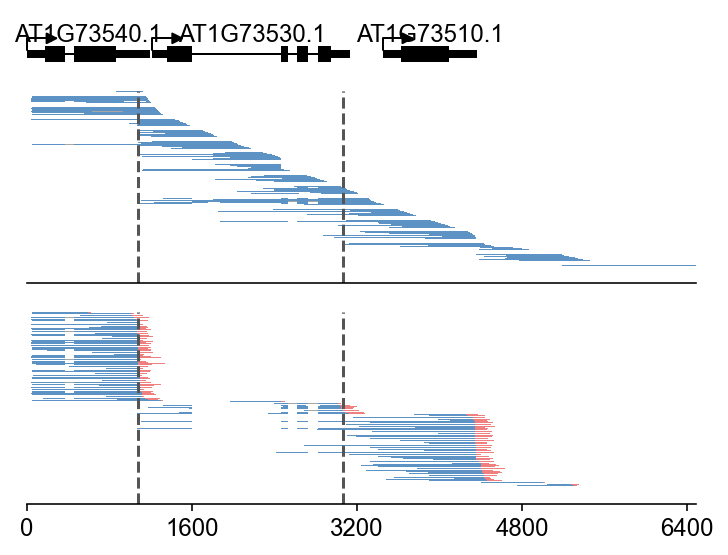

In [7]:
# get gene info
gene_id = 'AT1G73540'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query(
    'gene_id == @gene_id').values[0]


start = 27640985

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list={mRNA_id, 'AT1G73540.1', 'AT1G73530.1', 'AT1G73510.1'},
)

# 1
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        method='3_end',
        filter_strand=strand,
        start_before=pas-50,
        end_before=end
    )

#2
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/polyadenylated_data/20210301_xrn3.polyadenylated.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        method='3_end',
        filter_strand=strand,
#         end_before=end
    )


ax = igv_plot.plot(
    height=4.5,
    width=6,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1)

xlim = plt.xlim()
# plt.tight_layout()
plt.savefig(f'{gene_id}.all.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

### WT AT1G73530

n = 980
n = 1711


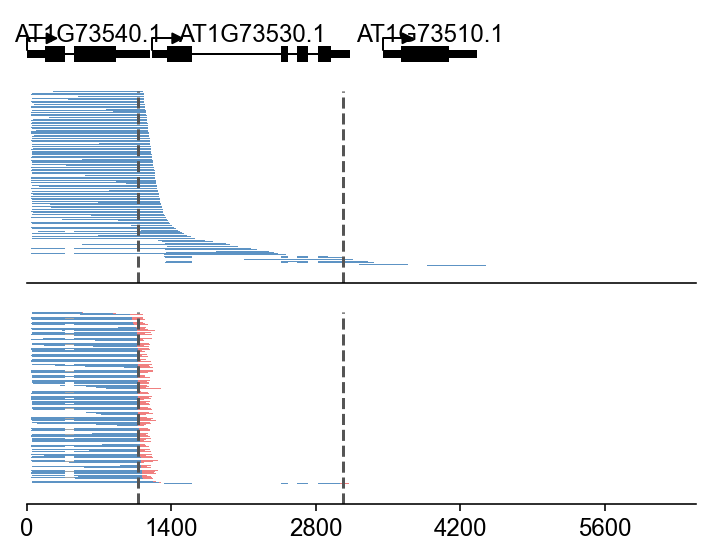

In [91]:
# get gene info
gene_id = 'AT1G73540'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query(
    'gene_id == @gene_id').values[0]


start = 27640985

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list={mRNA_id, 'AT1G73540.1', 'AT1G73530.1', 'AT1G73510.1'},
)

# 1
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/elongating_data/20210324_col_nuclear.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        method='3_end',
        filter_strand=strand,
        start_before=pas-50,
        end_before=end
    )

#2
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/polyadenylated_data/20210301_xrn3.polyadenylated.bam'
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/polyadenylated_data/20210324_col_nuclear.polyadenylated.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        method='3_end',
        filter_strand=strand,
#         end_before=end
    )


ax = igv_plot.plot(
    height=4.5,
    width=6,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1)

# xlim = plt.xlim()
plt.xlim(xlim)
# plt.tight_layout()
plt.savefig(f'{gene_id}.all.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

## AT1G76180

### xrn3 AT1G76180

n = 747
n = 632


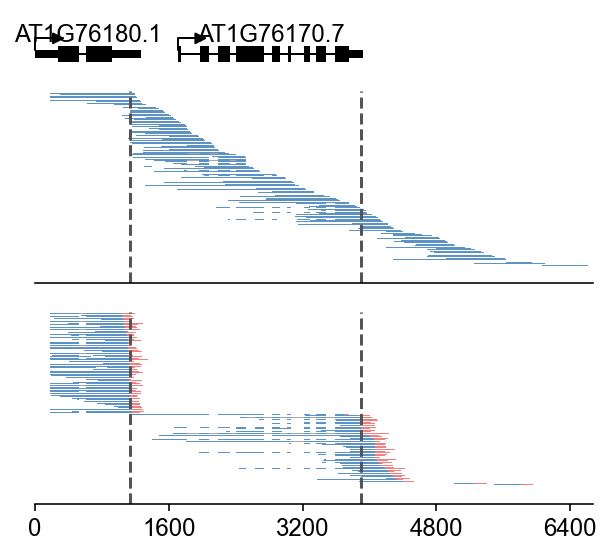

In [87]:
##### get gene info
gene_id = 'AT1G76180'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query(
    'gene_id == @gene_id').values[0]
if strand == '+':
    end = pas + 200
else:
    start = pas - 200

start = 28581259
# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list={mRNA_id, 'AT1G76180.1', 'AT1G76170.7'},
)

# 1
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        method='3_end',
        filter_strand=strand,
        start_before=pas - 50,
    )
    
# 2
infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/polyadenylated_data/20210301_xrn3.polyadenylated.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        method='3_end',
        filter_strand=strand,
#         start_before=pas - 50,
    )
    
ax = igv_plot.plot(
    height=4.5,
    width=5,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1)

# ax[1].axvline(pas, ls="--", color="#555555")

xlim = plt.xlim()

# plt.tight_layout()
plt.savefig(f'{gene_id}.all.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

### WT AT1G76180

n = 259
n = 1173


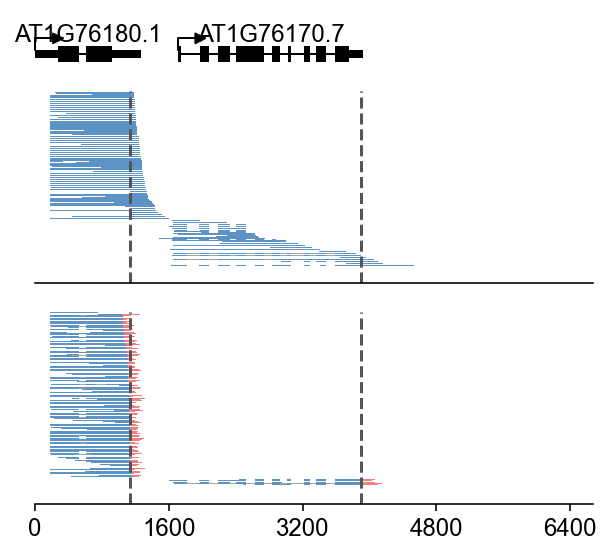

In [85]:
##### get gene info
gene_id = 'AT1G76180'
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc[gene_id]
gene_id, chrom, pas, strand, tw_len, max_tw_len, start, end = output_res.query(
    'gene_id == @gene_id').values[0]
if strand == '+':
    end = pas + 200
else:
    start = pas - 200

start = 28581259
# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list={mRNA_id, 'AT1G76180.1', 'AT1G76170.7'},
)

# 1
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/elongating_data/20210324_col_nuclear.elongating.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        method='3_end',
        filter_strand=strand,
        start_before=pas - 50,
    )
    
# 2
infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/polyadenylated_data/20210324_col_nuclear.polyadenylated.bam'
if strand == '-':
    igv_plot.add_bam(
        infile,
        method='3_end',
        filter_strand=strand,
#         start_before=pas - 50,
    )
    
ax = igv_plot.plot(
    height=4.5,
    width=5,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1)

# ax[1].axvline(pas, ls="--", color="#555555")

xlim = plt.xlim()

# plt.tight_layout()
plt.savefig(f'{gene_id}.all.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')